In [24]:
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np
from numpy import mean
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [5]:
data = pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
X = data.drop(columns = ['Class'], axis = 1) 
y = data['Class']

In [7]:
sc = StandardScaler()
X_scaler = sc.fit_transform(X)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_scaler,y, test_size=.25, random_state=42,stratify=y, shuffle =True)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.25, random_state=42)

In [14]:
over_sample = SMOTE()
X_smote, y_smote = over_sample.fit_resample(X_train,y_train)

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

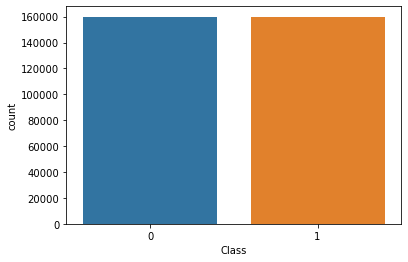

In [11]:
sns.countplot(y_smote)

### Build a new Random Forest Model with equally distributed data

In [16]:
rfc = RandomForestClassifier(random_state=5)
rfc.fit(X_smote,y_smote)
y_pred = rfc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.79      0.80      0.80       123

    accuracy                           1.00     71202
   macro avg       0.89      0.90      0.90     71202
weighted avg       1.00      1.00      1.00     71202



### Build a new XGBoost Model with equally distributed data

In [17]:
model = xgb.XGBClassifier()
model.fit(X_smote,y_smote)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.74      0.85      0.79       123

    accuracy                           1.00     71202
   macro avg       0.87      0.92      0.89     71202
weighted avg       1.00      1.00      1.00     71202



### Interpretation of the Result:

After the over sampling, F1 scores decreased both of them. However, recall scores increased. As a result, I can say that XGBoost or Random Forest can be used to detect the Credit Card Fraud trustfully.